In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Exploring Dataset

In [44]:
# READING CSV FILE

df = pd.read_csv('zomato.csv',encoding ='latin-1')
df.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
df.shape

(9551, 21)

In [72]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [73]:
df.duplicated().sum()

0

In [4]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [5]:
df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

In [6]:
# Reading "Country.csv" dataframe

In [7]:
df_country =pd.read_excel('Country-Code.xlsx')
df_country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [8]:
# Merging the DataFrames 

In [9]:
df_final = pd.merge(df,df_country,on='Country Code',how='left')

In [10]:
df_final.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

# Performing Customer Rating And Satisfaction Analysis

In [51]:
rate_df = df_final.groupby(['Rating color','Rating text']).size().reset_index().rename(columns={0:'count'})
percnt_df = df_final.groupby(['Rating color','Rating text']).size()/len(df['Restaurant ID'])*100
percnt_df = percnt_df.reset_index().rename(columns = {0:'Percentage of rating'})

rate_df = rate_df.merge(percnt_df,on = ['Rating color','Rating text'],how = 'inner')
rate_df

,Rating color,Rating text,count,Percentage of rating
0,Dark Green,Excellent,301,3.151502
1,Green,Very Good,1079,11.297246
2,Orange,Average,3737,39.126793
3,Red,Poor,186,1.947440
4,White,Not rated,2148,22.489792
5,Yellow,Good,2100,21.987226


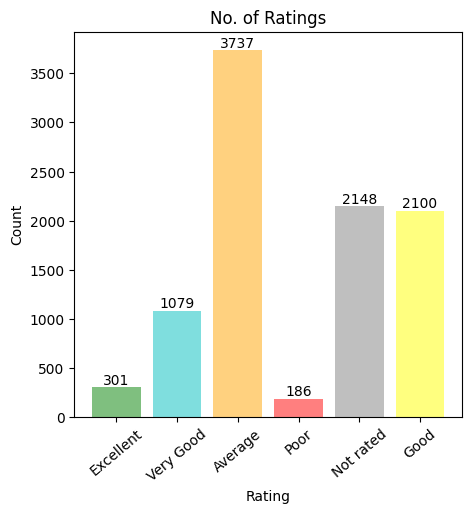

In [52]:
plt.figure(figsize=(5,5))


x = plt.bar(rate_df['Rating text'],rate_df['count'],color=['green','c','orange','red','grey','yellow'],alpha = 0.5)
plt.bar_label(x,labels=rate_df['count'],label_type='edge')
plt.xticks(rotation = 40)
plt.title('No. of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')

plt.show()

# Checking for zero rating

In [55]:
df_final.groupby(['Aggregate rating','Country']).size().reset_index().head().rename(columns = {0:'Count'})

,Aggregate rating,Country,Count
0,0.0,Brazil,5
1,0.0,India,2139
2,0.0,United Kingdom,1
3,0.0,United States,3
4,1.8,India,1


In [75]:
flt = (df_final['Aggregate rating'] == 0.0)
df_final[flt].groupby(['Country']).size().reset_index().rename(columns = {0:'Count_of_0_Rating'})


,Country,Count_of_0_Rating
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


# Checking how many countries has online delivery Facility

In [71]:
df_final.groupby(['Country','Has Online delivery']).size().reset_index().rename(columns ={0: 'Counts'})

,Country,Has Online delivery,Counts
0,Australia,No,24
1,Brazil,No,60
2,Canada,No,4
3,India,No,6229
4,India,Yes,2423
5,Indonesia,No,21
6,New Zealand,No,40
7,Phillipines,No,22
8,Qatar,No,20
9,Singapore,No,20


In [12]:
# Creating PieChart for Counrtywise usage

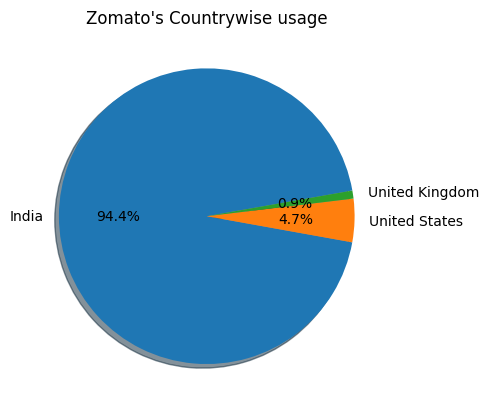

In [92]:
cnt=df_final['Country'].value_counts().index
val=df_final['Country'].value_counts().values



plt.pie(val[:3],labels=cnt[:3],autopct='%1.1f%%',startangle=10,shadow=True)
plt.title("Zomato's Countrywise usage")
plt.show()

# Top Cities with maximum order

In [90]:
city = df_final.groupby(['Country'])


ind_ct_indx =city.get_group('India')['City'].value_counts().index
ind_ct_val =city.get_group('India')['City'].value_counts().values


city_df =city.get_group('India')['City'].value_counts().head().reset_index()
city_df

,City,count
0,New Delhi,5473
1,Gurgaon,1118
2,Noida,1080
3,Faridabad,251
4,Ghaziabad,25


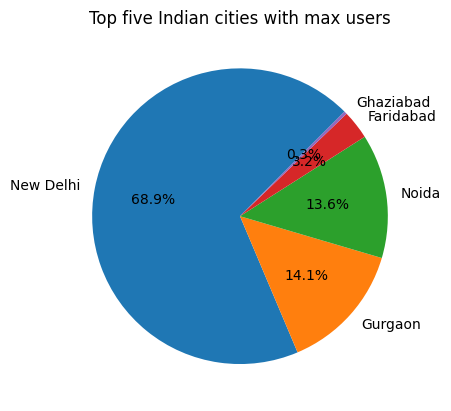

In [91]:
plt.pie(ind_ct_val[:5],labels=ind_ct_indx[:5],autopct='%1.1f%%',startangle = 45)
plt.title('Top five Indian cities with max users')
plt.show()

# Which Country uses which currency?

In [102]:
df_final[['Country', 'Currency']].drop_duplicates().reset_index().drop(columns = 'index')


,Country,Currency
0,Phillipines,Botswana Pula(P)
1,Brazil,Brazilian Real(R$)
2,United States,Dollar($)
3,Australia,Dollar($)
4,Canada,Dollar($)
5,Singapore,Dollar($)
6,UAE,Emirati Diram(AED)
7,India,Indian Rupees(Rs.)
8,Indonesia,Indonesian Rupiah(IDR)
9,New Zealand,NewZealand($)


# Cuisine Prefernce

In [103]:
cuis = df_final['Cuisines'].value_counts().head(5).reset_index()
cuis

,Cuisines,count
0,North Indian,936
1,"North Indian, Chinese",511
2,Chinese,354
3,Fast Food,354
4,"North Indian, Mughlai",334


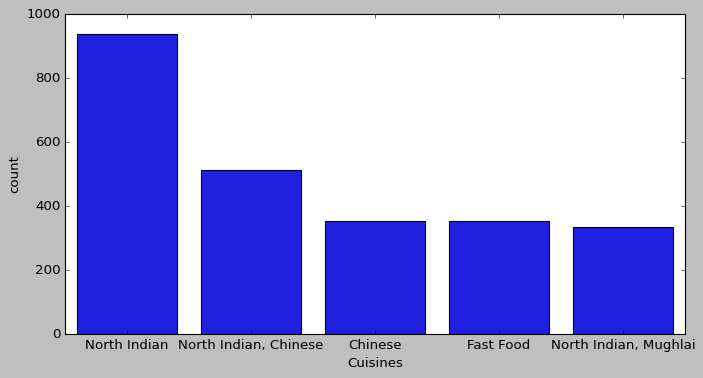

In [106]:
plt.style.use('classic')
plt.figure(figsize=(10,5))
sns.barplot(x='Cuisines',y='count',data=cuis)
plt.show()